# Medical Imaging

- Complete walkthrough of the steps taken to solve the two tasks
- run notebook in order to interactively play around with the 3D images
- the data can be obtained from this [link](https://drive.google.com/drive/folders/1vVpu9lgjqHB4UX9xLweQGW4qgAjCaOAh?usp=drive_link)

In [1]:
from typing import Tuple, List
import nibabel as nib
from nilearn.image import resample_img
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import interact, interactive, fixed, interact_manual

def print_pane_dim(shape:Tuple[int]) -> None:
    """
    takes in a tuple containing the images dimensions
    """
    # sag, cor, ax = shape
    panes = ['sagittal', 'coronal', 'axial']
    print('\n')
    for i, p in enumerate(panes):
        print(f"{p.ljust(8)}:\t{shape[i]}")
    print('\n')

ct_img = nib.load('data/CT.nii.gz')
ct_mtx = ct_img.get_fdata()
print("Dimensions of Computer Tomography image:\t", ct_mtx.shape)
print_pane_dim(ct_mtx.shape)

seg_img = nib.load('data/segmentation.nii.gz')
seg_mtx = seg_img.get_fdata()
print("Dimensions of Segmentation image:\t\t", seg_mtx.shape)
print_pane_dim(seg_mtx.shape)



Dimensions of Computer Tomography image:	 (512, 512, 541)


sagittal:	512
coronal :	512
axial   :	541


Dimensions of Segmentation image:		 (512, 512, 541)


sagittal:	512
coronal :	512
axial   :	541




Here, we see that the third dimension is larger than the first and second.

The get_fdata() function is a method in the nibabel library in Python, which is used for reading neuroimaging data formats, including NIfTI.

When loading a NIfTI file using ```nibabel.load()```, it returns a ``Nifti1Image`` object. This object contains the header and image data from the NIfTI file, but the image data is not immediately loaded into memory to save resources.

The ``get_fdata()`` method is used to load the image data into memory as a numpy array. This is useful when you need to manipulate the image data, such as performing mathematical operations, resampling, or displaying the image.

# The Data at Glance

As we have seen, the data we are working with is 3D, which can be represented in the form of an 3D-array. Regular images are 2D (black and white $\to$ RGB images have 3 dimensions too), meaning that we virtually can slice through the space and thereby can look *inside* the object.\\

The typical three *perspectives* in medical imaging are as follows:

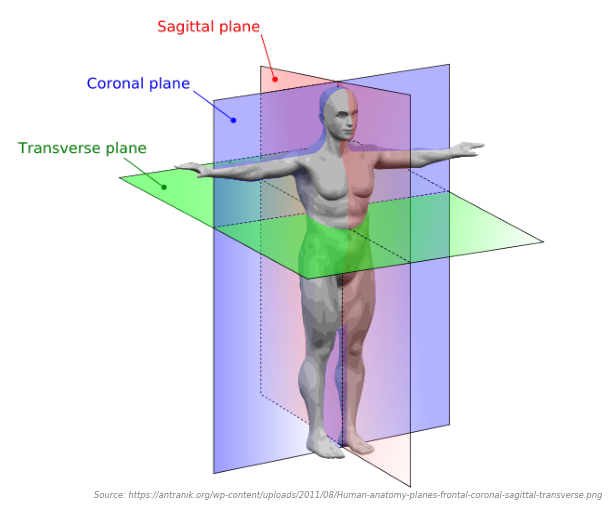

In [2]:
img = mpimg.imread('images/panes.png')
plt.figure(figsize=(7,7))
plt.imshow(img)
plt.text(x=img.shape[1]//1.6, y=img.shape[0], s='Source: https://antranik.org/wp-content/uploads/2011/08/Human-anatomy-planes-frontal-coronal-sagittal-transverse.png', 
         fontsize=6, color='grey', ha='center', style='italic')
plt.axis('off')
plt.show()
# print(img.shape)

In [3]:
def explore_ct_image(layer):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))  
    panes = ['sagittal', 'coronal', 'transverse/axial']
    mtx = ct_mtx
    for dim in range(len(mtx.shape)):
        if dim == 0:
            axs[dim].imshow(mtx[layer, :, :], cmap='gray')
        elif dim == 1:
            axs[dim].imshow(mtx[:, layer, :], cmap='gray')
        else:
            axs[dim].imshow(mtx[:, :, layer], cmap='gray')

        axs[dim].set_title(f"Dimension {dim+1}: {panes[dim]} plane", family='Arial', fontsize=20)
        axs[dim].axis('off')
        
    plt.tight_layout()

    return layer

interact(explore_ct_image, layer=(0, min(ct_mtx.shape[2]-1, ct_mtx.shape[1]-1)))

interactive(children=(IntSlider(value=255, description='layer', max=511), Output()), _dom_classes=('widget-int…

<function __main__.explore_ct_image(layer)>

![Slider1](images/slider1.PNG)

From a sagittal and coronal view, the image appears to be squished. The voxels (Pixels in 2D $\approx$ Voxels in 3D) must therefore be scaled.

In [4]:
def explore_seg_image(layer):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))  
    panes = ['sagittal', 'coronal', 'transverse/axial']
    mtx = seg_mtx
    for dim in range(len(mtx.shape)):
        if dim == 0:
            axs[dim].imshow(mtx[layer, :, :], cmap='gray')
        elif dim == 1:
            axs[dim].imshow(mtx[:, layer, :], cmap='gray')
        else:
            axs[dim].imshow(mtx[:, :, layer], cmap='gray')

        axs[dim].set_title(f"Dimension {dim+1}: {panes[dim]} plane", family='Arial', fontsize=20)
        axs[dim].axis('off')
        
    plt.tight_layout()

    return layer


interact(explore_seg_image, layer=(0, min(seg_mtx.shape[2]-1, seg_mtx.shape[1]-1)))

interactive(children=(IntSlider(value=255, description='layer', max=511), Output()), _dom_classes=('widget-int…

<function __main__.explore_seg_image(layer)>

![Slider2](images/slider2.PNG)

# Task 1

### a) Load the CT image, resample the image to an isotropic $^*$ resolution of 3x3x3mm

$^*$ isotropic $=$ same in all directions ... meaning, that all dimensions should be of the same scale

In [5]:
new_voxel_size = [3, 3, 3]

# resample and safe image iff not done yet
try:
    resampled_mtx = resampled_img.get_fdata()
except NameError:
    print("Resampling image...")
    resampled_img = resample_img(ct_img, target_affine=np.diag(new_voxel_size), interpolation='nearest')
    nib.save(resampled_img, 'data/resampled_CT.nii.gz')
    resampled_img = nib.load('data/resampled_CT.nii.gz')
    resampled_mtx = resampled_img.get_fdata()



def explore_resampled_image(layer1, layer2):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))  
    panes = ['sagittal', 'coronal', 'transverse/axial']
    mtx = resampled_mtx
    cmap = 'gray'
    for dim in range(len(mtx.shape)):
        if dim == 0:
            axs[dim].imshow(mtx[layer1, :, :], cmap=cmap)
        elif dim == 1:
            axs[dim].imshow(mtx[:, layer1, :], cmap=cmap)
        else:
            axs[dim].imshow(mtx[:, :, layer2], cmap=cmap)

        axs[dim].set_title(f"Dimension {dim+1}: {panes[dim]} plane", family='Arial', fontsize=20)
        axs[dim].axis('off')
        
    plt.tight_layout()

    return layer1, layer2

interact(explore_resampled_image, layer1=(0, min(resampled_mtx.shape[0]-1, resampled_mtx.shape[1]-1)), layer2=(0, resampled_mtx.shape[2]-1))

Resampling image...


interactive(children=(IntSlider(value=80, description='layer1', max=161), IntSlider(value=225, description='la…

<function __main__.explore_resampled_image(layer1, layer2)>

![Slider3](images/slider3.PNG)

### b) Create one maximum intensity projection (MIP) along the coronal axis and one MIP along the sagittal axis


In [6]:
# arbitrary 3D array for demonstrating the amax method
arr = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

max_value_0 = np.amax(arr, axis=0)
max_value_1 = np.amax(arr, axis=1)
max_value_2 = np.amax(arr, axis=2)
max_value_all = np.amax(arr)

print("Max along axis 0:", max_value_0)
print("Max along axis 1:", max_value_1)
print("Max along axis 2:", max_value_2)
print("Max of all elements:", max_value_all)

Max along axis 0: [[ 7  8  9]
 [10 11 12]]
Max along axis 1: [[ 4  5  6]
 [10 11 12]]
Max along axis 2: [[ 3  6]
 [ 9 12]]
Max of all elements: 12


Original voxel sizes in mm: (0.9433594, 0.9433594, 2.5)
Resampled voxel sizes in mm: (3.0, 3.0, 3.0)


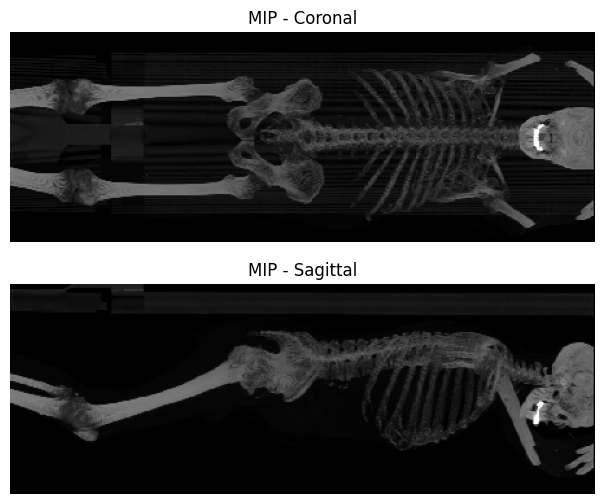

In [7]:
# header contains image metadata
ct_zoom = ct_img.header.get_zooms()
resampled_zoom = resampled_img.header.get_zooms()
print(f"Original voxel sizes in mm: {ct_zoom}\nResampled voxel sizes in mm: {resampled_zoom}")


mip_sagittal = np.amax(resampled_mtx, axis=0)
mip_coronal = np.amax(resampled_mtx, axis=1)

fig, axs = plt.subplots(2, 1, figsize=(12, 6))


axs[0].imshow(mip_coronal, cmap='gray')
axs[0].set_title("MIP - Coronal")
axs[0].axis('off')

axs[1].imshow(mip_sagittal, cmap='gray')
axs[1].set_title("MIP - Sagittal")
axs[1].axis('off')

plt.show()

### c) Save the resulting images as PNG file with at least 400 dp

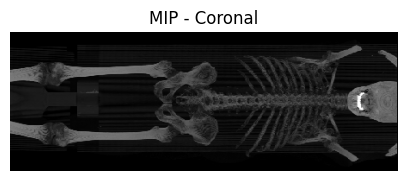

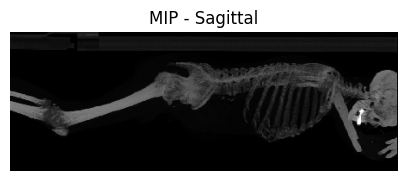

In [8]:
DPI = 600 
assert DPI >= 400, "DPI should be at least 400 for high quality images"

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(mip_coronal, cmap='gray')
ax.set_title("MIP - Coronal")
ax.axis('off')
fig.savefig("images/mip_coronal.png", dpi=600)


fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(mip_sagittal, cmap='gray')
ax.set_title("MIP - Sagittal")
ax.axis('off')
fig.savefig("images/mip_sagittal.png", dpi=600)

np.amax: np.amax is a function from the NumPy library that computes the maximum value along a specified axis of an array.

In the code, np.amax is used to compute the maximum intensity projection (MIP) along the coronal and sagittal axes of the resampled CT image. By specifying axis=0 and axis=1, respectively, we calculate the maximum intensity projection along the coronal and sagittal axes. This operation effectively collapses the 3D image along the specified axes, resulting in 2D images representing the maximum intensity projection.





### Little Bonus: Visualizing the aorta in the CT-scan

In [9]:
# first, we need to resample the segmentation image to the same voxel size as the CT image
new_voxel_size = [3, 3, 3]

# resample and safe image iff not done yet
try:
    resampled_seg_mtx = resampled_seg_img.get_fdata()
except NameError:
    print("Resampling image...")
    resampled_seg_img = resample_img(seg_img, target_affine=np.diag(new_voxel_size), interpolation='nearest')
    nib.save(resampled_seg_img, 'data/resampled_segmentation.nii.gz')
    resampled_seg_img = nib.load('data/resampled_segmentation.nii.gz')
    resampled_seg_mtx = resampled_seg_img.get_fdata()



def explore_resampled_image(layer1, layer2):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))  
    panes = ['sagittal', 'coronal', 'transverse/axial']
    mtx = resampled_seg_mtx
    cmap = 'gray'
    for dim in range(len(mtx.shape)):
        if dim == 0:
            axs[dim].imshow(mtx[layer1, :, :], cmap=cmap)
        elif dim == 1:
            axs[dim].imshow(mtx[:, layer1, :], cmap=cmap)
        else:
            axs[dim].imshow(mtx[:, :, layer2], cmap=cmap)

        axs[dim].set_title(f"Dimension {dim+1}: {panes[dim]} plane", family='Arial', fontsize=20)
        axs[dim].axis('off')
        
    plt.tight_layout()

    return layer1, layer2

interact(explore_resampled_image, layer1=(0, min(resampled_seg_mtx.shape[0]-1, resampled_seg_mtx.shape[1]-1)), layer2=(0, resampled_seg_mtx.shape[2]-1))

Resampling image...


interactive(children=(IntSlider(value=80, description='layer1', max=161), IntSlider(value=225, description='la…

<function __main__.explore_resampled_image(layer1, layer2)>

![Slider4](images/slider4.PNG)

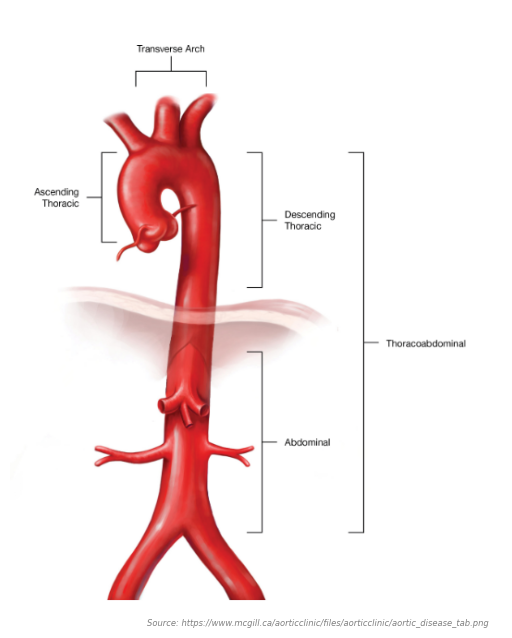

In [10]:
img = mpimg.imread('images/aorta.png')
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.text(x=img.shape[1]//1.6, y=img.shape[0], s='Source: https://www.mcgill.ca/aorticclinic/files/aorticclinic/aortic_disease_tab.png', 
         fontsize=6, color='grey', ha='center', style='italic')
plt.axis('off')
plt.show()

In [11]:
# resampled_img = nib.load('data/resampled_CT.nii.gz')
# resampled_seg_img = nib.load('data/resampled_segmentation.nii.gz')
# resampled_mtx = resampled_img.get_fdata()
# resampled_seg_mtx = resampled_seg_img.get_fdata()

# ensure the images have the same dimensions
assert resampled_mtx.shape == resampled_seg_mtx.shape, "Images don't posess the same dimensions"

highlighted_mtx = np.copy(resampled_mtx)

# set intensity of the highlighted (segmented) region
highlight_intensity = np.max(resampled_mtx)

# iterating over the voxels 
for i in range(resampled_seg_mtx.shape[0]):
    for j in range(resampled_seg_mtx.shape[1]):
        for k in range(resampled_seg_mtx.shape[2]):
            # if the voxel value is 1 (=white), change the corresponding voxel in the medical image to the highlight intensity
            if resampled_seg_mtx[i, j, k] == 1:
                highlighted_mtx[i, j, k] = highlight_intensity

# convert np array to nibabel image
highlighted_img = nib.Nifti1Image(highlighted_mtx, resampled_img.affine)
nib.save(highlighted_img, 'data/highlighted_resampled_CT.nii.gz')


def explore_highlighted_image(layer1, layer2):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))  
    panes = ['sagittal', 'coronal', 'transverse/axial']
    mtx = highlighted_mtx
    cmap = 'gray'
    for dim in range(len(mtx.shape)):
        if dim == 0:
            axs[dim].imshow(mtx[layer1, :, :], cmap=cmap)
        elif dim == 1:
            axs[dim].imshow(mtx[:, layer1, :], cmap=cmap)
        else:
            axs[dim].imshow(mtx[:, :, layer2], cmap=cmap)

        axs[dim].set_title(f"Dimension {dim+1}: {panes[dim]} plane", family='Arial', fontsize=20)
        axs[dim].axis('off')
        
    plt.tight_layout()
    return layer1, layer2

interact(explore_highlighted_image, layer1=(0, min(highlighted_mtx.shape[0]-1, highlighted_mtx.shape[1]-1)), layer2=(0, highlighted_mtx.shape[2]-1))

interactive(children=(IntSlider(value=80, description='layer1', max=161), IntSlider(value=225, description='la…

<function __main__.explore_highlighted_image(layer1, layer2)>

![Slider5](images/slider5.PNG)

We can clearly see the typical shape of the aorta, including the transverse arch and ascending and descending thoracic.

## Task 2

### Calculate the volume of the segmented aorta (in ```segmentation.nii.gz```) in **millilitres**

In [12]:
flat = seg_mtx.flatten()   
set(flat)

{0.0, 1.0}

We thereby see, that the voxels are represented by binary values ```{0: 'black', 1: 'white'}```.\\

Thereby, to compute the volume of the aorta artery, we just need to count the number of voxels, compute the volume of a voxel, and perform simple calculus.\\

Note, that $1,000,000\;mm^3 = 1\;liter = 1\;dm^3$ \\

The calculation to determine the volume of the aorta can be done in various ways. Here are two of them:

In [13]:
print("Volume computed with original (anisotropic) image:\n")
white_voxels = np.sum(seg_mtx == 1)  

print("approach 1:")
volume = np.sum(seg_mtx) * np.prod(seg_img.header.get_zooms()) / 1000_000 # convert to litres
print(f'The volume of the segmented aorta is {volume * 1000} millilitres.\n') # convert to millilitres

print("approach 2:")
# to get the volume, we need to consider the voxel sizes (x*y*z)
voxel_vol = seg_img.header.get_zooms()[0] * seg_img.header.get_zooms()[1] * seg_img.header.get_zooms()[2]   
white_voxel_vol = white_voxels * voxel_vol

print("Volume of Aorta:", white_voxel_vol, "cubic milimeters")
print("Volume of Aorta:", white_voxel_vol/10**(3+3) * 1000, "millilitres")
print("Volume of Aorta:", white_voxel_vol/10**(3+3), "litres")

Volume computed with original (anisotropic) image:

approach 1:
The volume of the segmented aorta is 323.7954567146301 millilitres.

approach 2:
Volume of Aorta: 323795.4567146301 cubic milimeters
Volume of Aorta: 323.7954567146301 millilitres
Volume of Aorta: 0.3237954567146301 litres


In [14]:
print("Volume computed with resampled (isotropic) image:\n")
white_voxels = np.sum(resampled_seg_mtx == 1)  

print("approach 1:")
volume = np.sum(resampled_seg_mtx) * np.prod(resampled_seg_img.header.get_zooms()) / 1000_000 
print(f'The volume of the segmented aorta is {volume*1000} millilitres.\n') 

print("approach 2:")
voxel_vol = resampled_seg_img.header.get_zooms()[0] * resampled_seg_img.header.get_zooms()[1] * resampled_seg_img.header.get_zooms()[2]   
white_voxel_vol = white_voxels * voxel_vol

print("Volume of Aorta:", white_voxel_vol, "cubic milimeters")
print("Volume of Aorta:", white_voxel_vol/10**(3+3) * 1000, "millilitres")
print("Volume of Aorta:", white_voxel_vol/10**(3+3), "litres")

Volume computed with resampled (isotropic) image:

approach 1:
The volume of the segmented aorta is 325.10699999999997 millilitres.

approach 2:
Volume of Aorta: 325107.0 cubic milimeters
Volume of Aorta: 325.10699999999997 millilitres
Volume of Aorta: 0.325107 litres


The volume of the isotropic and anisotropic sligthly differ by $\approx$ 1.3 millilitres. This may be due to the interpolation that is necessary to resample the image.

In [16]:
!jupyter nbconvert --to latex development.ipynb

Traceback (most recent call last):
  File "C:\Users\marku\AppData\Roaming\Python\Python311\site-packages\traitlets\traitlets.py", line 623, in get
    value = obj._trait_values[self.name]  # type: ignore
            ~~~~~~~~~~~~~~~~~^^^^^^^^^^^
KeyError: 'template_paths'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\marku\miniconda3\Scripts\jupyter-nbconvert.EXE\__main__.py", line 7, in <module>
  File "C:\Users\marku\AppData\Roaming\Python\Python311\site-packages\jupyter_core\application.py", line 285, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\marku\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1046, in launch_instance
    app.start()
  File "C:\Users\marku\minico